## DPO FineTuning Results & Visualizations
### LlaMA-3.2, Gemma3, Phi2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Set plot style
# plt.style.use('seaborn')
sns.set_palette("husl")

In [49]:
df_llama = pd.read_csv("evaluation_results_llama.csv")
df_gemma = pd.read_csv("evaluation_results_gemma.csv")
df_phi = pd.read_csv("evaluation_results_phi.csv")

In [50]:
print(f"Llama Shape: {df_llama.shape}, Gemma Shape: {df_gemma.shape}, Phi Shape: {df_phi.shape}")

Llama Shape: (20, 28), Gemma Shape: (20, 28), Phi Shape: (20, 28)


In [51]:
# 1. Bar Plot: Average Metrics Comparison
def plot_average_metrics(df, model_name, ft_model_name):
    # Extract numerical metrics for baseline and finetuned
    baseline_metrics = [col for col in df.columns if col.startswith('baseline_') and col not in ['baseline_response', 'baseline_geval_reasoning_reason']]
    finetuned_metrics = [col.replace('baseline_', 'finetuned_') for col in baseline_metrics]
    
    # Calculate means
    baseline_means = df[baseline_metrics].mean()
    finetuned_means = df[finetuned_metrics].mean()
    
    # Clean metric names for display
    metric_names = [col.replace('baseline_', '') for col in baseline_metrics]
    
    # Plot
    plt.figure(figsize=(14, 6))
    x = np.arange(len(metric_names))
    width = 0.35
    
    plt.bar(x - width/2, baseline_means, width, label='Baseline', color='bisque')
    plt.bar(x + width/2, finetuned_means, width, label='Finetuned', color='cadetblue')
    
    plt.xlabel('Metrics')
    plt.ylabel('Average Score')
    plt.title(f'Average Metric Scores: {model_name} vs {ft_model_name}')
    plt.xticks(x, metric_names, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

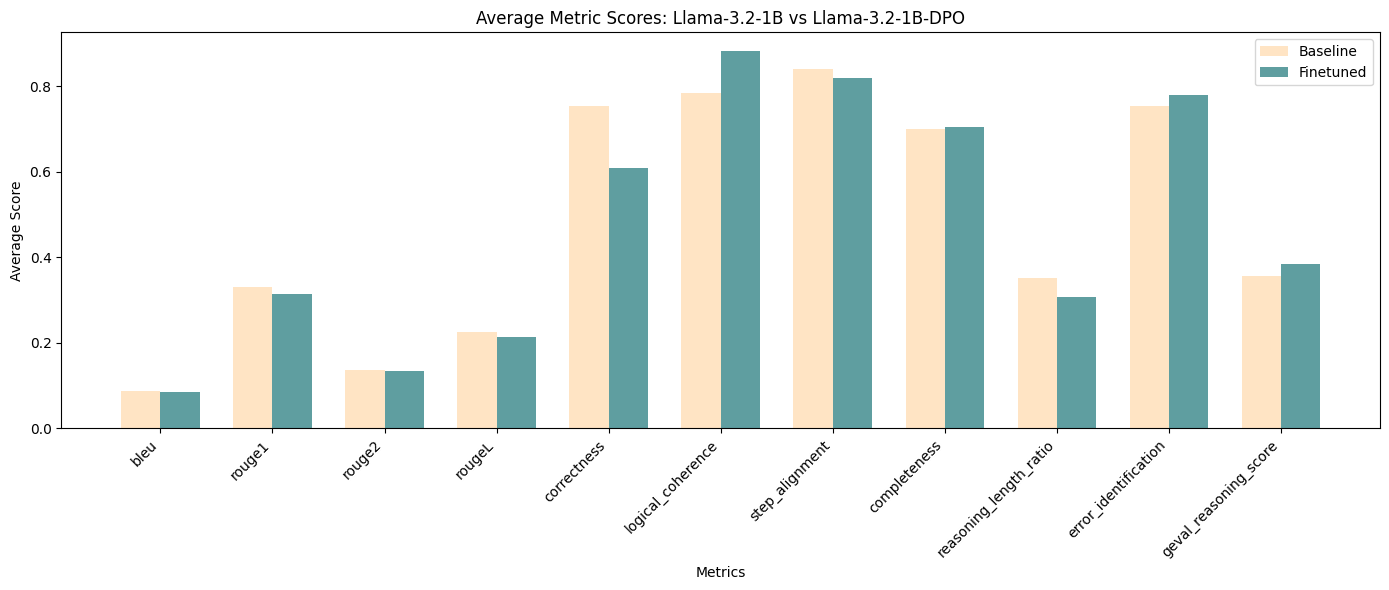

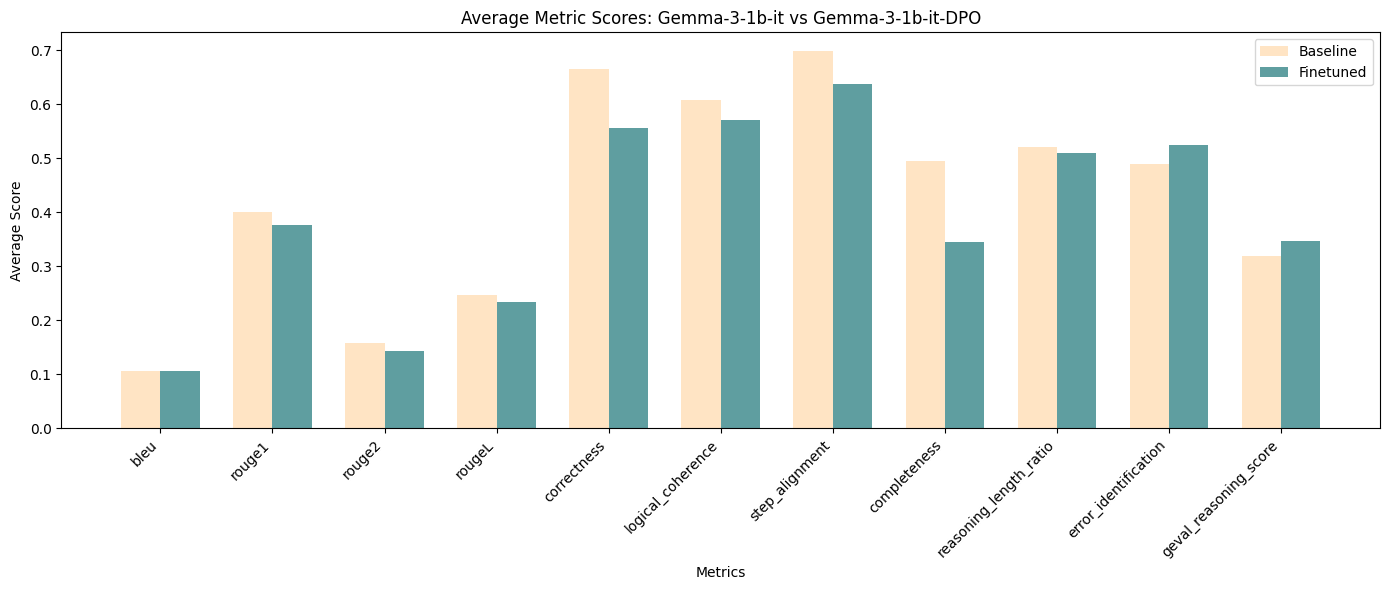

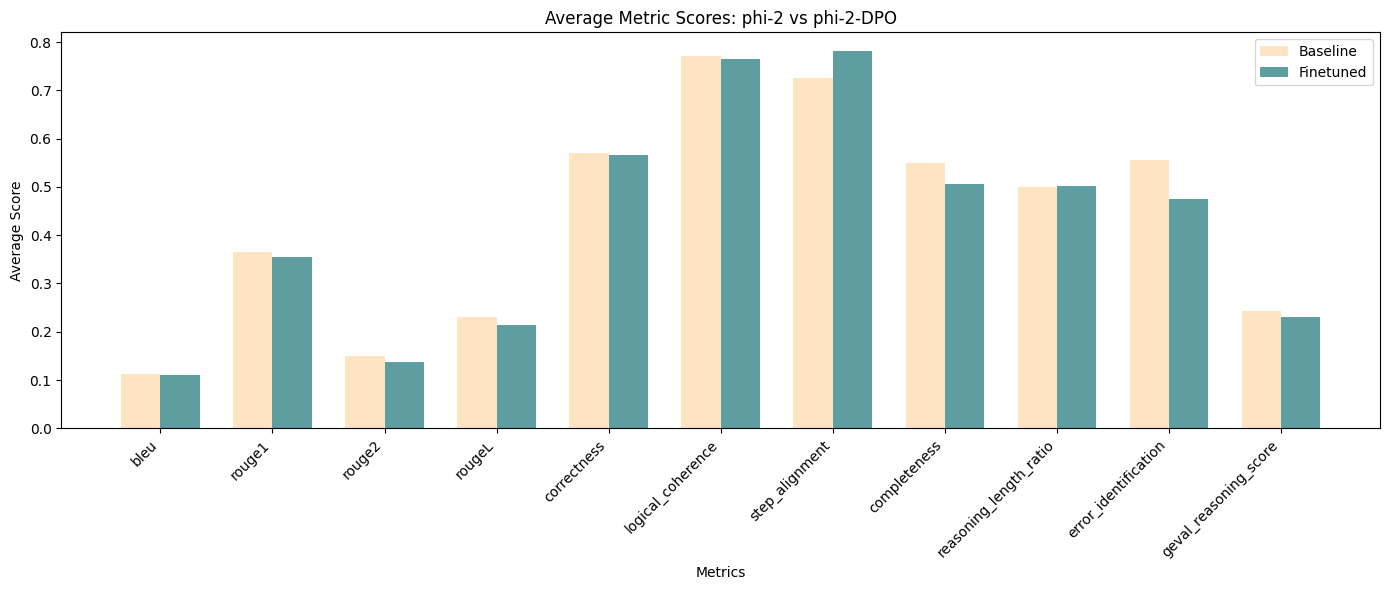

In [52]:
plot_average_metrics(df_llama, "Llama-3.2-1B", "Llama-3.2-1B-DPO")
plot_average_metrics(df_gemma, "Gemma-3-1b-it", "Gemma-3-1b-it-DPO")
plot_average_metrics(df_phi, "phi-2", "phi-2-DPO")

In [53]:
def plot_per_question_comparison(df):
    key_metrics = ['bleu', 'correctness', 'geval_reasoning_score']
    df['question'] = ['Q' + str(i + 1) for i in range(len(df))]

    baseline_cols = [f'baseline_{m}' for m in key_metrics]
    finetuned_cols = [f'finetuned_{m}' for m in key_metrics]

    melted_df = pd.melt(df, id_vars=['question'], value_vars=baseline_cols + finetuned_cols, 
                        var_name='metric_model', value_name='score')
    melted_df['model'] = melted_df['metric_model'].apply(lambda x: 'Baseline' if 'baseline' in x else 'Finetuned')
    melted_df['metric'] = melted_df['metric_model'].apply(lambda x: x.split('_')[1])

    for metric in key_metrics:
        print(metric)
        plt.figure(figsize=(12, 5))
        if metric == 'geval_reasoning_score':
            subset_df = melted_df[melted_df['metric'] == 'geval']
        else:    
            subset_df = melted_df[melted_df['metric'] == metric]
        sns.barplot(data=subset_df, x='question', y='score', hue='model', palette='GnBu')
        plt.title(f'{metric.capitalize()} Scores per Question: Baseline vs Finetuned')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

bleu


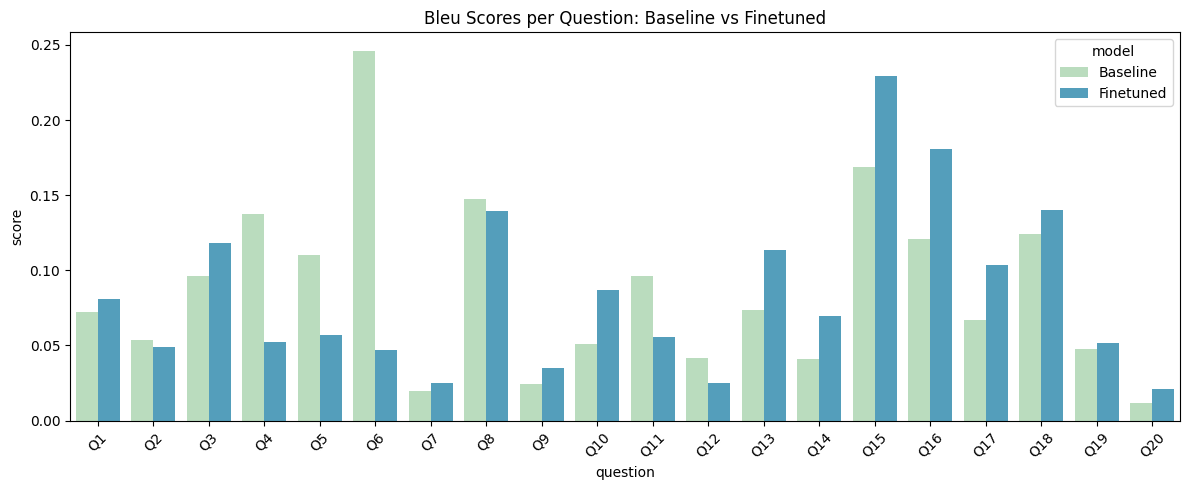

correctness


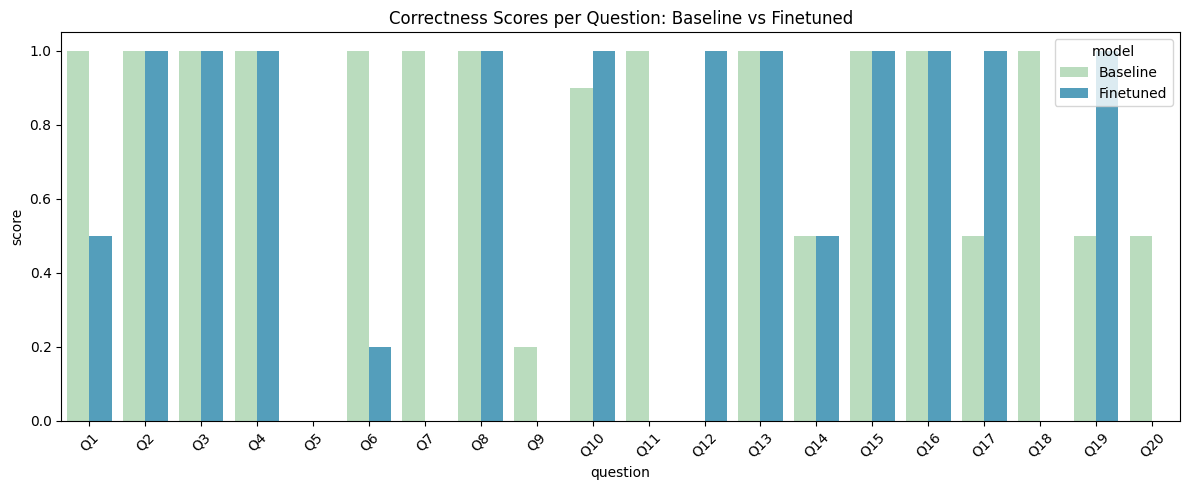

geval_reasoning_score


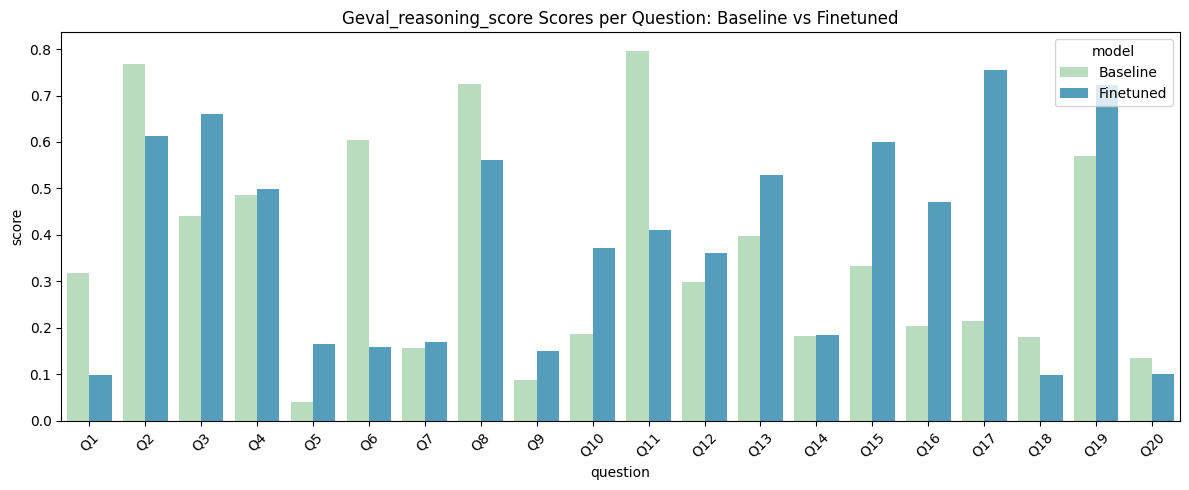

In [54]:
plot_per_question_comparison(df_llama)

bleu


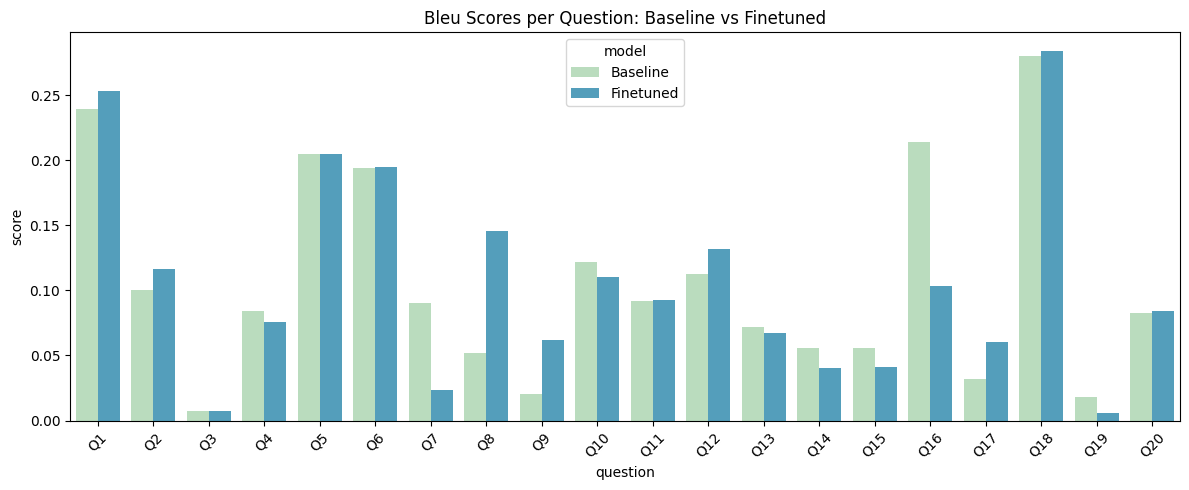

correctness


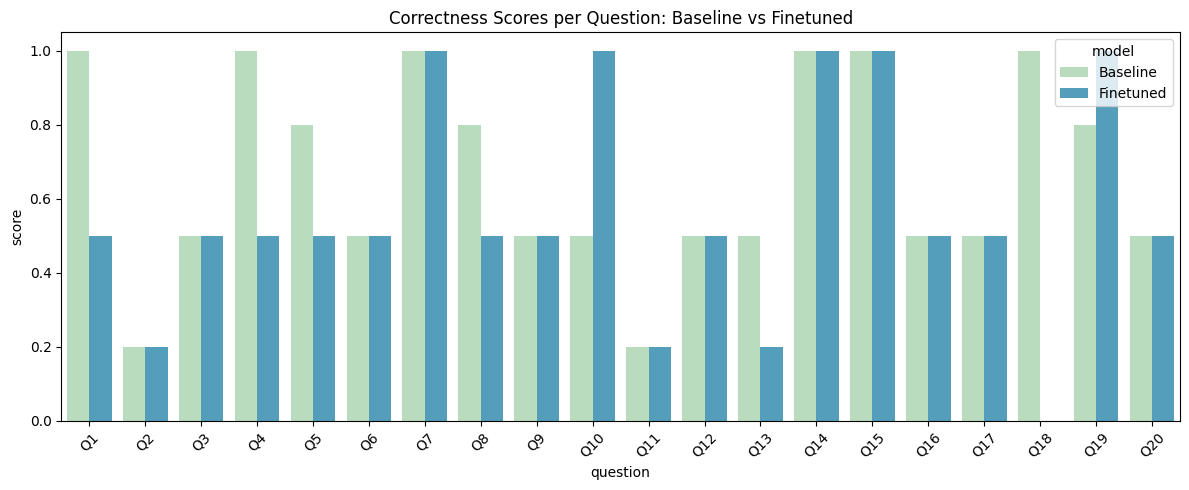

geval_reasoning_score


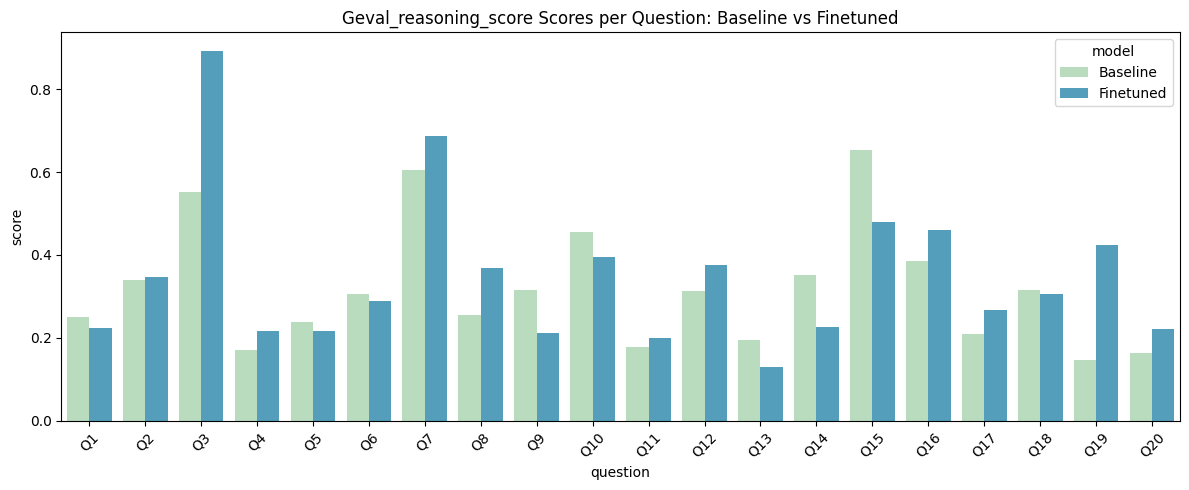

In [55]:
plot_per_question_comparison(df_gemma)

bleu


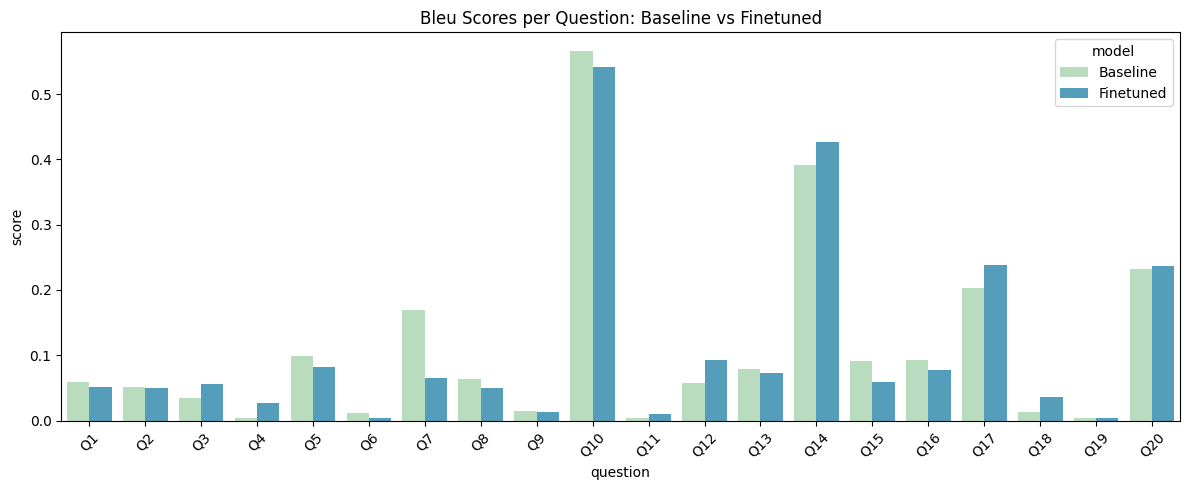

correctness


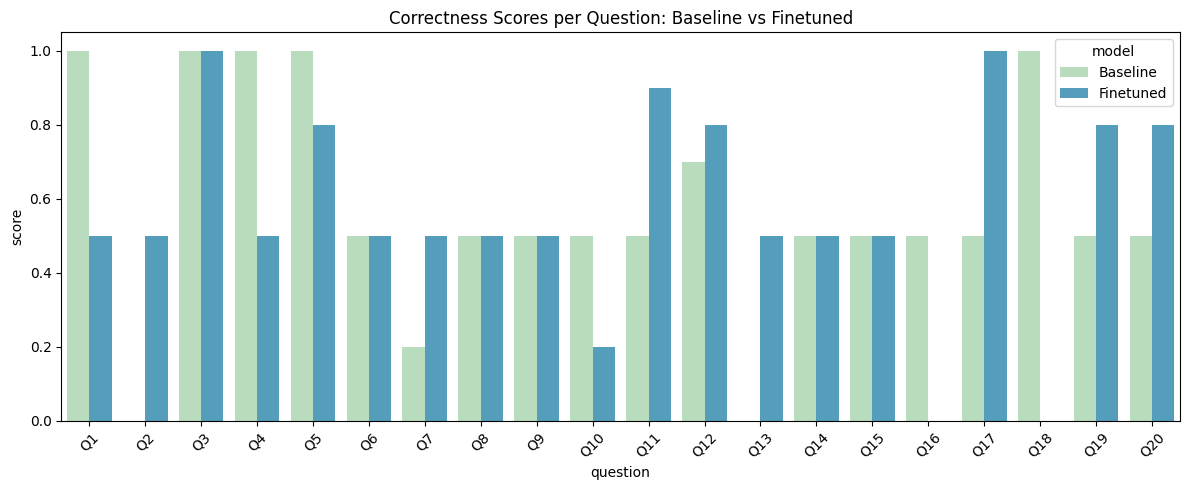

geval_reasoning_score


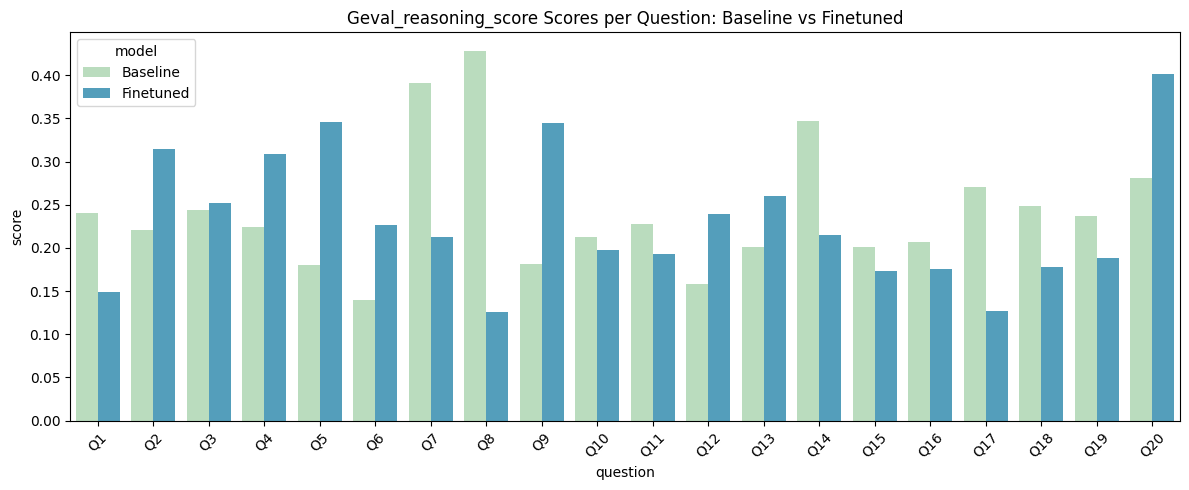

In [56]:
plot_per_question_comparison(df_phi)

In [57]:
def display_table_with_reasons(df):
    # Select key columns for display
    display_cols = ['question', 'baseline_bleu', 'baseline_correctness', 'baseline_geval_reasoning_score', 
                    'baseline_geval_reasoning_reason', 'finetuned_bleu', 'finetuned_correctness', 
                    'finetuned_geval_reasoning_score', 'finetuned_geval_reasoning_reason']
    display_df = df[display_cols]
    
    # Style the DataFrame
    styled_df = display_df.style.set_properties(**{
        'text-align': 'left',
        'font-size': '12pt',
        'border-style': 'solid',
        'border-width': '1px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center'), ('background-color', '#f2f2f2')]}
    ])
    
    print("\nTable of Key Metrics with GEval Reasons:")
    display(styled_df)

In [58]:
display_table_with_reasons(df_llama)


Table of Key Metrics with GEval Reasons:


,question,baseline_bleu,baseline_correctness,baseline_geval_reasoning_score,baseline_geval_reasoning_reason,finetuned_bleu,finetuned_correctness,finetuned_geval_reasoning_score,finetuned_geval_reasoning_reason
0,Q1,0.072138,1.000000,0.318062,"The actual output does not explicitly state each reasoning step, critical steps from the reference are not clearly identified, and the final conclusion is not explicitly matched with the reference. Only general steps are provided without specific calculations or conclusions.",0.081153,0.500000,0.097221,"The Actual Output does not match the Expected Output as it does not provide the correct step-by-step solution for finding the sum of the ${p}_{a,b}$'s for all possible combinations of a and b."
1,Q2,0.053303,1.000000,0.768678,The actual output precisely follows every step and correctly solves for e as expected from the input.,0.048828,1.000000,0.612788,"The steps followed the evaluation criteria, but the final solution is missing the expected output value."
2,Q3,0.096143,1.000000,0.439957,"The final conclusion does not match the expected output, as the actual output provides interval notation as (-infinity, 25/17), while the expected output provides the correct answer as (-infinity, 0).",0.118166,1.000000,0.660938,"Input, Actual Output, and Expected Output are all consistent and follow the evaluation steps provided."
3,Q4,0.137761,1.000000,0.486618,"The input text consists of clear and logical steps that lead to the correct final answer, but the presentation does not exactly match the expected output format.",0.052373,1.000000,0.499777,"The actual output provides step-by-step solution but does not explicitly state each reasoning step in the hypothesis, missing clarity on how each step logically follows from the previous one."
4,Q5,0.110006,0.000000,0.039214,"The given solution did not follow the intended steps. Actual Output calculated incorrect values for 'a' and 'b', leading to an incorrect final answer.",0.056644,0.000000,0.164977,"The solution does not follow the steps correctly and gives an incorrect answer. The actual output calculates the values of a and b incorrectly and provides 10.59 as the final result, which is incorrect compared to the expected output of 18."
5,Q6,0.246057,1.000000,0.603323,Actual output provided the correct step-by-step solution but did not explicitly state each reasoning step or mention properties of exponents. Expected Output provides a complete and clear solution following the reference.,0.046860,0.200000,0.158736,"The steps taken provide detailed explanations and calculations for simplifying the expression, but stray from the expected line of reasoning following the guidelines in the evaluation steps."
6,Q7,0.019389,1.000000,0.155733,The actual output does not provide the correct integer roots as per the expected output.,0.024827,0.000000,0.170082,"The actual output does not follow the provided steps, the expected output does not match actual output and answer provided is incorrect."
7,Q8,0.147228,1.000000,0.725738,"Input, Actual Output, and Expected Output information are concise and match, but Actual Output lacks the systematic and logical step-by-step approach as outlined in the evaluation steps.",0.139392,1.000000,0.560737,"The actual output follows the evaluation steps in finding the values of a and b, but the format of the final answer does not match the expected output. The answer provided in the actual output is a fraction while the expected output requires the whole number value of the answer."
8,Q9,0.024111,0.200000,0.087861,The actual output does not contain the correct application of the Pythagorean theorem to find the missing side lengths and calculate the perimeter as stated in the expected output.,0.035036,0.000000,0.150511,"The explanation follows the steps provided - 1) all reasoning steps are clearly stated, 2) contains all critical steps, 3) final answer is correct and supported by reasoning."
9,Q10,0.051277,0.900000,0.186508,The actual

In [59]:
display_table_with_reasons(df_gemma)


Table of Key Metrics with GEval Reasons:


,question,baseline_bleu,baseline_correctness,baseline_geval_reasoning_score,baseline_geval_reasoning_reason,finetuned_bleu,finetuned_correctness,finetuned_geval_reasoning_score,finetuned_geval_reasoning_reason
0,Q1,0.239140,1.000000,0.249350,"The answer provided does not accurately calculate the ratio of the areas of circle A to circle B, it is missing the step to square the ratio of the radii and only provides the ratio of the radii.",0.253397,0.500000,0.222771,"The solution correctly calculates the arc lengths for circles A and B, but does not proceed to find the ratio of the areas as expected. The final conclusion and answer are missing."
1,Q2,0.100207,0.200000,0.339470,The reasoning presented in the actual output does not mention the concept of $f$ being an odd function. It does not provide a step-by-step solution to find $f(-5)$.,0.116710,0.200000,0.347349,The hypothesis evaluation includes reasoning steps and matches the reference for determining $f(-5)$ based on the properties of the function and input-output relationship.
2,Q3,0.007150,0.500000,0.551545,The Actual Output does not provide the solution steps or the correct answer as outlined in the Expected Output.,0.007370,0.500000,0.892574,"The hypothesis closely follows the evaluation steps outlined. Specific details from Input, Actual Output, and Expected Output are referenced concisely in the solution."
3,Q4,0.084432,1.000000,0.171122,"The actual output provides some steps that match the expected output, but it does not fully follow the evaluation steps and does not provide the final correct answer.",0.075859,0.500000,0.217045,"The text provides a step-by-step solution to finding the coefficient of x^2 in the expansion of the given product, adhering to the evaluation steps."
4,Q5,0.204395,0.800000,0.239079,"The input, actual output, and expected output are not compared directly, only one step is shown clearly.",0.204557,0.500000,0.217267,"The hypothesis does not explicitly state the reasoning steps, the provided work does not align with the reference, and the final conclusion is incorrect as it should be even but is stated as either neither or odd."
5,Q6,0.193942,0.500000,0.305598,"The approach to solving the inequality is correct, but the final conclusion does not match the expected output which gives the answer as 5 based on the interval comparison.",0.194746,0.500000,0.289483,The steps provided are correct but the final conclusion does not match the reference. Expected integer to be 5 based on the explanations.
6,Q7,0.090603,1.000000,0.603691,"The output provides the step-by-step solution, matches the expected format, and the final answer is correct.",0.023133,1.000000,0.685774,The actual output provides a step-by-step solution that matches the expected output and the final answer is correct.
7,Q8,0.051623,0.800000,0.255699,"The actual output does not explicitly state each reasoning step, missing the final step where it concludes 0 real values.",0.145343,0.500000,0.368397,"The initial set-up of “a@1” is correct. However, the solution to the equation is incomplete and does not provide the final conclusion matching the expected output."
8,Q9,0.020270,0.500000,0.314833,The actual solution presented in the text is incomplete compared to the expected solution. It provides the solution only for x >= 0 case and does not address the x < 0 case. This falls short of following the evaluation steps that require addressing all critical steps.,0.061766,0.500000,0.211850,The Actual Output provides steps for solving the given equation but does not complete the solution by finding the roots and computing the product as requested in the Input and Expected Output.
9,Q10,0.121824,0.500000,0.455710,"The hypothesis lacks the explicit reasoning steps, and the final conclusion does not match the reference solution.",0.110092,1.000000,0.394325,The text does not provide a step-by-step solution or explicitly state the relationship between the complex numbers z and c.


In [60]:
display_table_with_reasons(df_phi)


Table of Key Metrics with GEval Reasons:


,question,baseline_bleu,baseline_correctness,baseline_geval_reasoning_score,baseline_geval_reasoning_reason,finetuned_bleu,finetuned_correctness,finetuned_geval_reasoning_score,finetuned_geval_reasoning_reason
0,Q1,0.059395,1.000000,0.239846,"The input, actual output, and expected output are adequately provided, but the step-by-step solution does not explicitly state each reasoning step and does not logically follow from the previous steps.",0.050825,0.500000,0.149003,"The actual output provides the step-by-step solution to find the total area of the two non-shaded crescent-shaped regions, which matches the expected output. The answer given is a numerical value rather than the expected algebraic expression."
1,Q2,0.050959,0.000000,0.220548,Actual Output does not provide the final conclusion matching the reference and does not support the reasoning steps. The answer is not explicitly stated or outlined step-by-step.,0.049217,0.500000,0.314298,"The text provides step-by-step simplification of the expression, but does not provide the final conclusion that matches the expected output."
2,Q3,0.034917,1.000000,0.243404,"The text provides step-by-step calculations but does not explicitly state each reasoning step, critical steps from the reference are missing, and the final conclusion does not match the reference.",0.056254,1.000000,0.251915,"The provided solution gives the correct percentage for the children population (4%), but the steps are not clearly explained or logically connected."
3,Q4,0.004222,1.000000,0.223919,"The solution provided missed detailing the calculation of the total area of the non-hexagonal faces, which is a critical step per the reference solution.",0.027646,0.500000,0.309171,The actual output is missing steps 2 and 3 from the solution provided. The expected output provides the correct step-by-step solution and final answer.
4,Q5,0.098896,1.000000,0.180442,"The reasoning steps are explicitly stated, and the final conclusion matches the reference and is supported by the reasoning.",0.082619,0.800000,0.345998,"The actual output contains detailed instructions and reasoning steps in a logical order matching the reference, but lacks the concise final conclusion directly stating the length $AB=5$ as in the expected output."
5,Q6,0.011912,0.500000,0.139104,Actual Output does not include the step-by-step solution as requested in the input and expected output.,0.004443,0.500000,0.226215,"The provided text shows the steps of multiplying the probability with the amount, but does not clearly state them as reasoning steps as required. Additionally, the final answer should be in the format of a currency value, which is not consistent with the expected output."
6,Q7,0.169867,0.200000,0.391518,"Some critical steps from the reference are present in the hypothesis such as multiplying by the conjugate of the denominator and substituting the values of i^2, but there are missing calculations and simplifications when evaluating the expression.",0.064683,0.500000,0.212546,The actual output does not show the step-by-step solution as outlined in the evaluation steps. The final answer is also incorrect when compared to the expected output.
7,Q8,0.064424,0.500000,0.428227,Actual Output provides a step-by-step solution but does not clearly explain the process of determining the largest possible number of cupcakes with none of the ingredients. Expected Output gives a concise and clear explanation of the answer.,0.050132,0.500000,0.125605,The text does not explicitly state the reasoning steps and does not match the critical steps from the reference. The final conclusion does not align with the expected output as it does not provide the correct largest possible number of cupcakes with none of the ingredients.
8,Q9,0.014195,0.500000,0.181260,"The text includes some relevant steps and information from the Expected Output, but does not fully solve the problem and provide the correct answer.",0.013576,0.500000,0.345196,"The solution does not e

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample model DataFrames: llama_df, gemma_df, phi_df
# Add a 'model' column to identify each one
df_llama['model'] = 'LLaMA'
df_gemma['model'] = 'Gemma'
df_phi['model'] = 'Phi'

# Combine all into one
df = pd.concat([df_llama, df_gemma, df_phi], ignore_index=True)

# Metrics to compare
metrics = [
    'bleu', 'rouge1', 'rouge2', 'rougeL',
    'correctness', 'logical_coherence', 'step_alignment',
    'completeness', 'reasoning_length_ratio',
    'error_identification', 'geval_reasoning_score'
]


In [62]:
import pandas as pd

# Identify metric columns (excluding "reason" columns which are text)
metrics = [
    'bleu', 'rouge1', 'rouge2', 'rougeL', 'correctness',
    'logical_coherence', 'step_alignment', 'completeness',
    'reasoning_length_ratio', 'error_identification', 'geval_reasoning_score'
]

# Melt the dataframe
melted = pd.wide_to_long(df, 
                         stubnames=['baseline', 'finetuned'],
                         i=['question', 'model'], 
                         j='metric', 
                         sep='_', 
                         suffix='|'.join(metrics)).reset_index()


In [63]:
# Step 1: Filter numeric columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Optional: Ensure you're only picking relevant metrics
metrics = [col for col in numeric_cols if col.startswith('baseline_') or col.startswith('finetuned_')]

# Step 2: Group and compute mean only on numeric metrics
model_means = df.groupby('model')[metrics].mean()

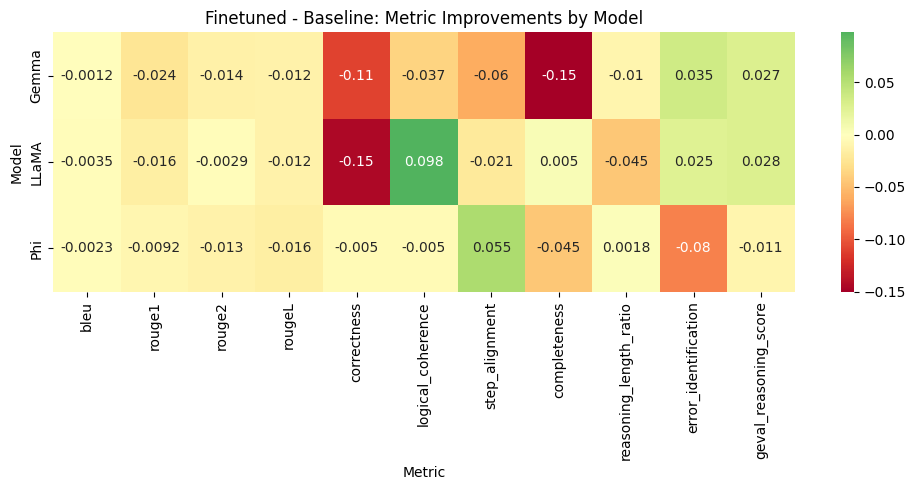

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate baseline and finetuned metrics
baseline_metrics = [col for col in metrics if col.startswith('baseline_')]
finetuned_metrics = [col.replace('baseline_', 'finetuned_') for col in baseline_metrics]

# Compute improvements
baseline_avg = df.groupby('model')[baseline_metrics].mean()
finetuned_avg = df.groupby('model')[finetuned_metrics].mean()

improvement = finetuned_avg.values - baseline_avg.values

# Clean column names for plotting
metric_names = [col.replace('baseline_', '') for col in baseline_metrics]
improvement_df = pd.DataFrame(improvement, index=baseline_avg.index, columns=metric_names)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(improvement_df, annot=True, cmap='RdYlGn', center=0)
plt.title("Finetuned - Baseline: Metric Improvements by Model")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


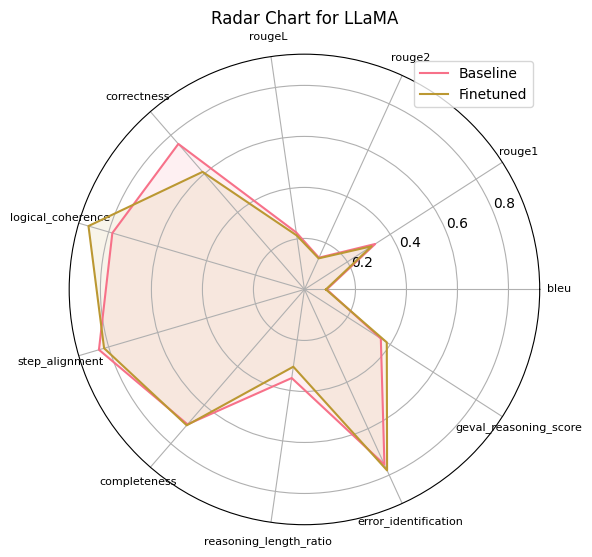

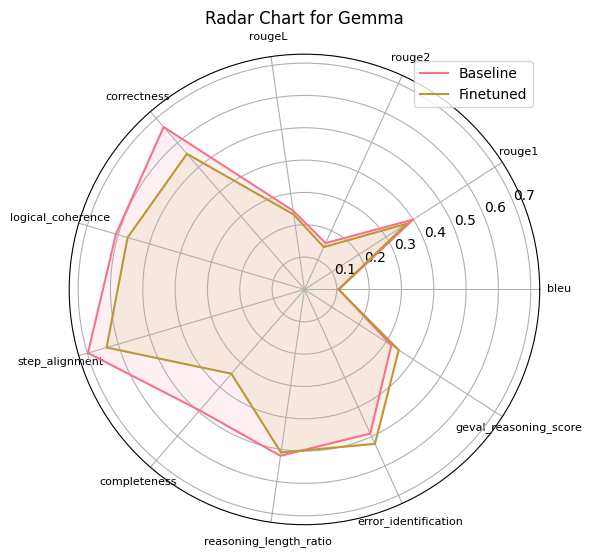

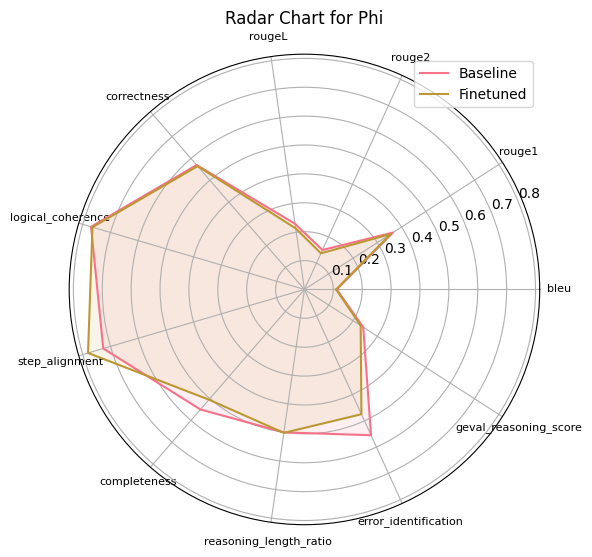

In [65]:
from math import pi

def radar_plot(model_name):
    metrics = ['bleu', 'rouge1', 'rouge2', 'rougeL', 'correctness',
               'logical_coherence', 'step_alignment', 'completeness',
               'reasoning_length_ratio', 'error_identification',
               'geval_reasoning_score']
    
    angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
    angles += angles[:1]

    model_df = df[df['model'] == model_name]
    baseline = model_df[[f'baseline_{m}' for m in metrics]].mean().tolist()
    finetuned = model_df[[f'finetuned_{m}' for m in metrics]].mean().tolist()

    baseline += baseline[:1]
    finetuned += finetuned[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, baseline, label='Baseline')
    ax.plot(angles, finetuned, label='Finetuned')
    ax.fill(angles, baseline, alpha=0.1)
    ax.fill(angles, finetuned, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, size=8)
    plt.title(f'Radar Chart for {model_name}')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Call for each model
for model in df['model'].unique():
    radar_plot(model)

In [66]:
df_llama_new = df[df["model"]=="LLaMA"]
df_gemma_new = df[df["model"]=="Gemma"]
df_phi_new = df[df["model"]=="Phi"]

In [67]:
def improvement_metrics(df, model):
    improvement_per_metric = {}
    for metric in ['bleu', 'rouge1', 'rouge2', 'rougeL', 'correctness',
                'logical_coherence', 'step_alignment', 'completeness',
                'reasoning_length_ratio', 'error_identification',
                'geval_reasoning_score']:
        improvement_per_metric[metric] = (
            df[f'finetuned_{metric}'] - df[f'baseline_{metric}']
        ).mean()

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(improvement_per_metric.keys()), y=list(improvement_per_metric.values()))
    plt.title(f"Average Improvement (Finetuned - Baseline) for {model}")
    plt.ylabel("Average Gain")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

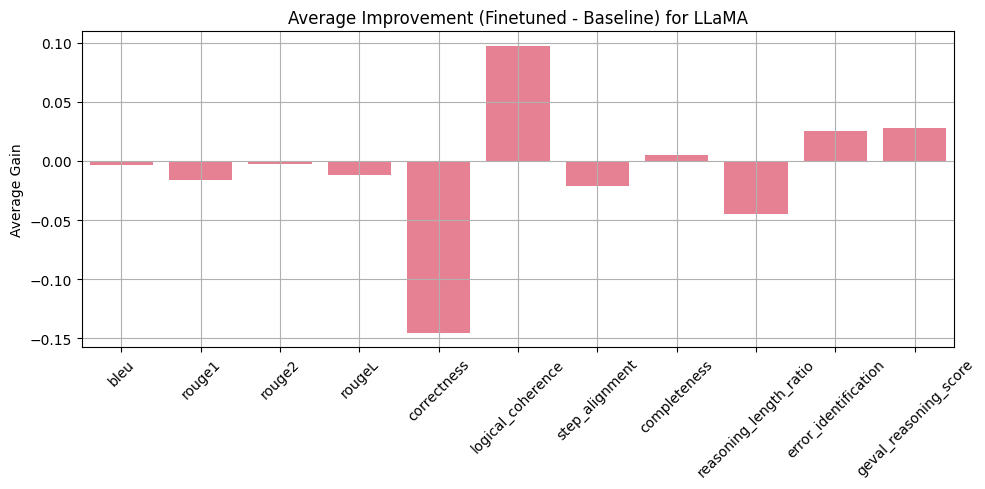

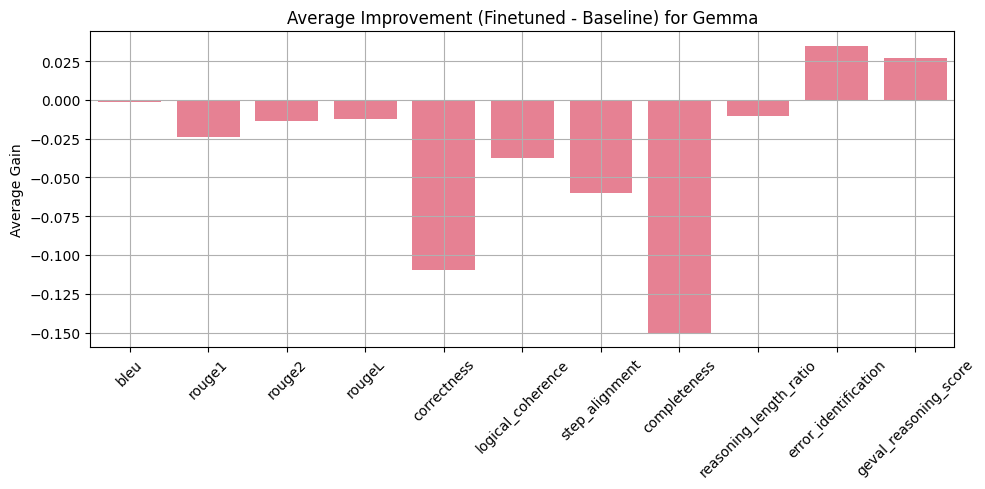

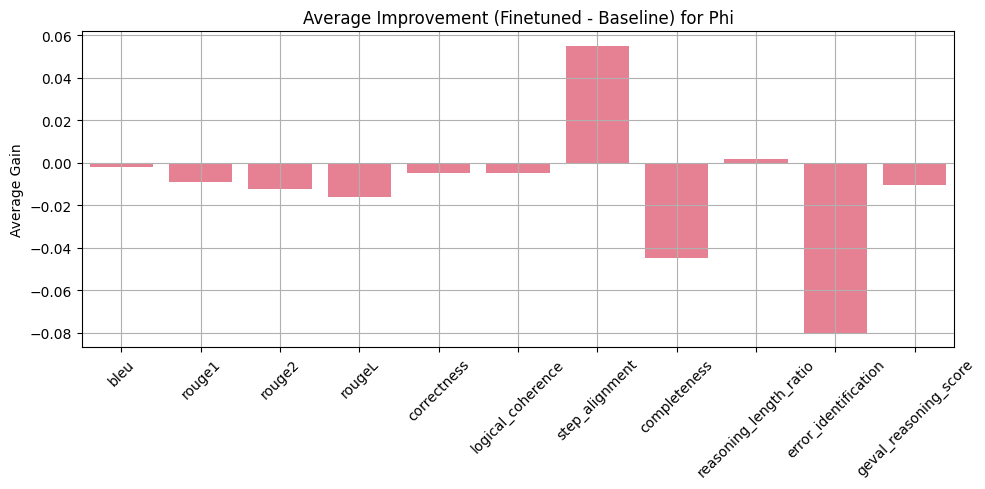

In [68]:
improvement_metrics(df_llama_new, "LLaMA")
improvement_metrics(df_gemma_new, "Gemma")
improvement_metrics(df_phi_new, "Phi")

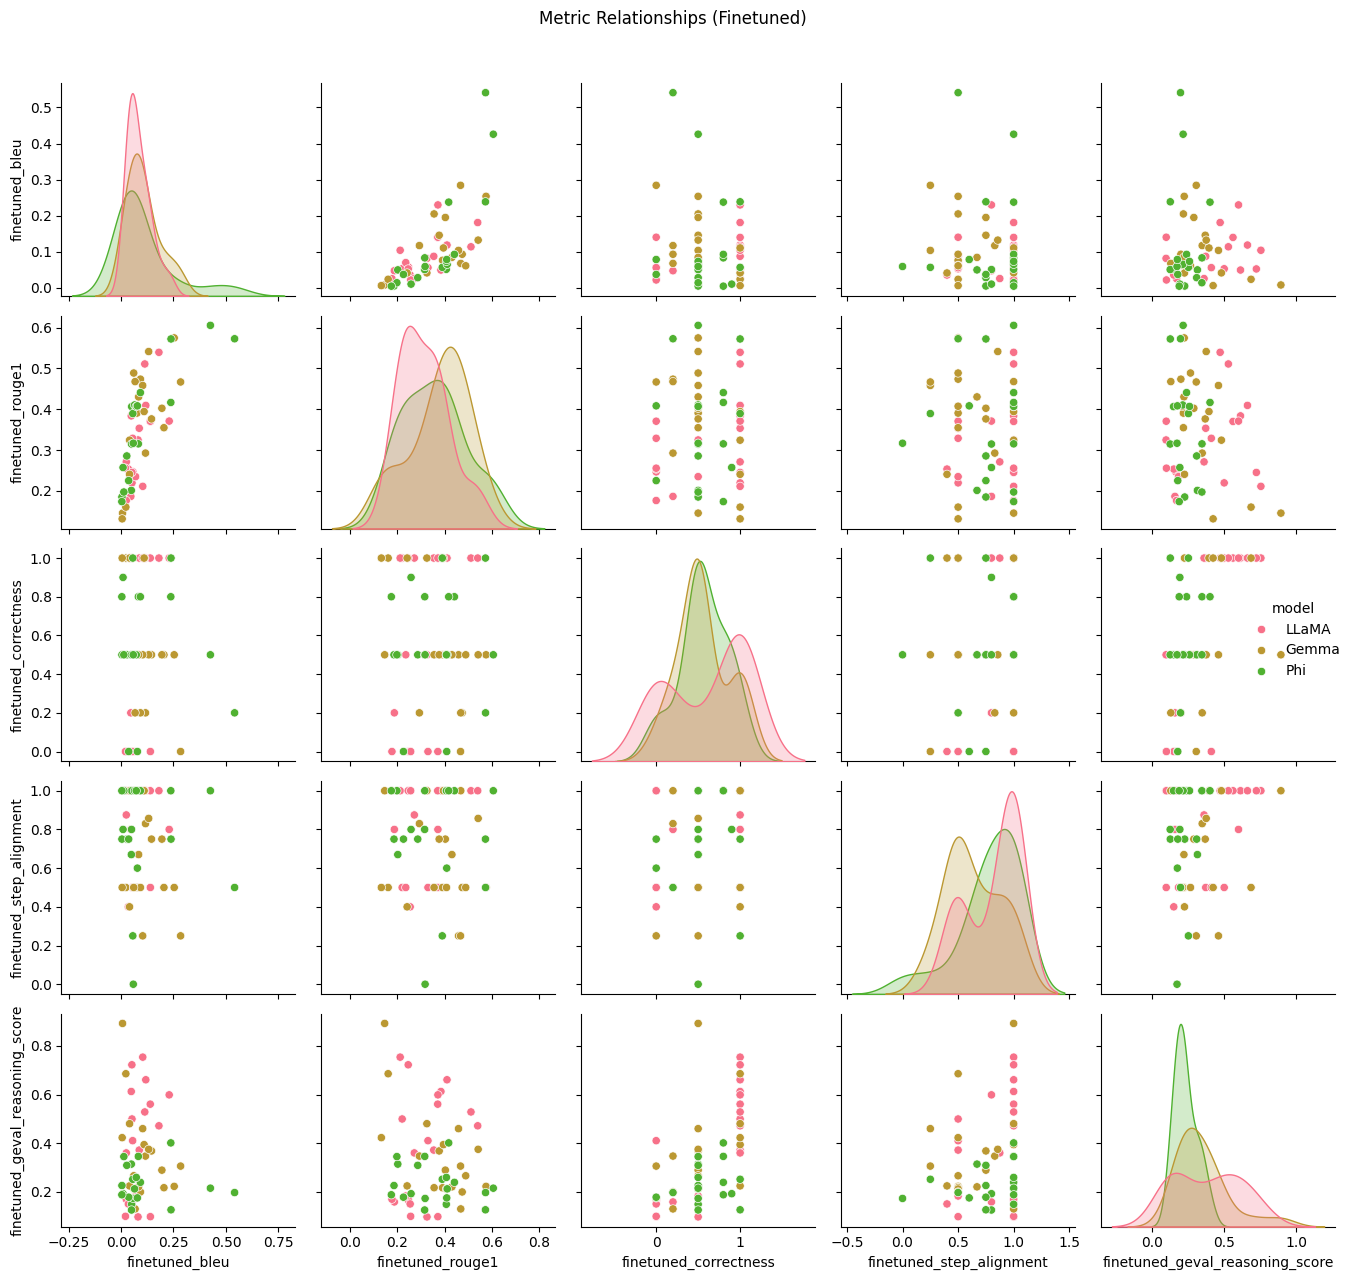

In [69]:
sns.pairplot(df, vars=[
    'finetuned_bleu', 'finetuned_rouge1', 'finetuned_correctness',
    'finetuned_step_alignment', 'finetuned_geval_reasoning_score'
], hue='model')
plt.suptitle("Metric Relationships (Finetuned)", y=1.02)
plt.tight_layout()
plt.show()


In [70]:
# Add word count columns
df['question_len'] = df['question'].str.split().apply(len)
df['ground_truth_len'] = df['ground_truth'].str.split().apply(len)
df['baseline_response_len'] = df['baseline_response'].str.split().apply(len)
df['finetuned_response_len'] = df['finetuned_response'].str.split().apply(len)


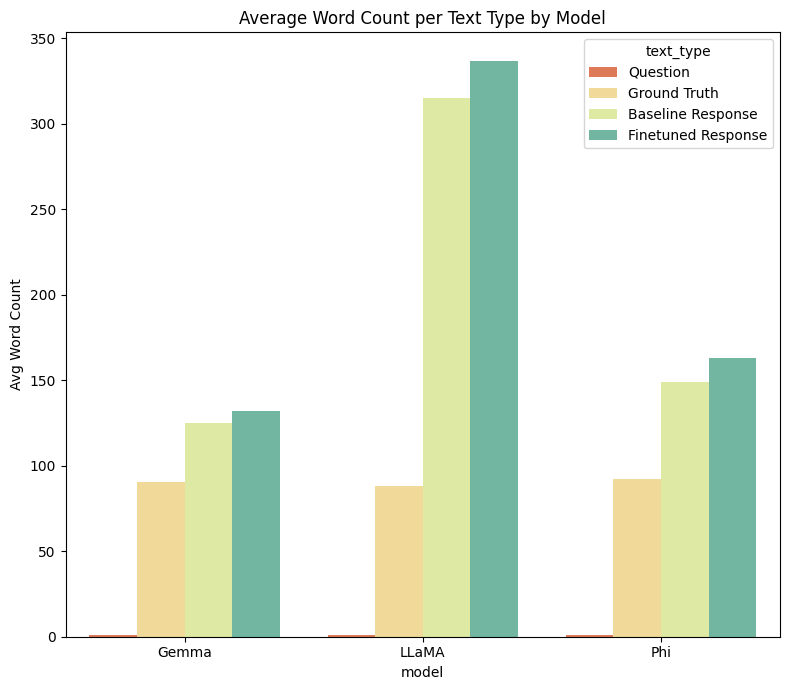

In [71]:
avg_lengths = df.groupby('model')[
    ['question_len', 'ground_truth_len', 'baseline_response_len', 'finetuned_response_len']
].mean().reset_index()

avg_lengths_melted = avg_lengths.melt(id_vars='model', var_name='text_type', value_name='avg_word_count')

# Clean column names
avg_lengths_melted['text_type'] = avg_lengths_melted['text_type'].str.replace('_len', '').str.replace('_', ' ').str.title()

plt.figure(figsize=(8, 7))
sns.barplot(data=avg_lengths_melted, x='model', y='avg_word_count', hue='text_type', palette='Spectral')
plt.title("Average Word Count per Text Type by Model")
plt.ylabel("Avg Word Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

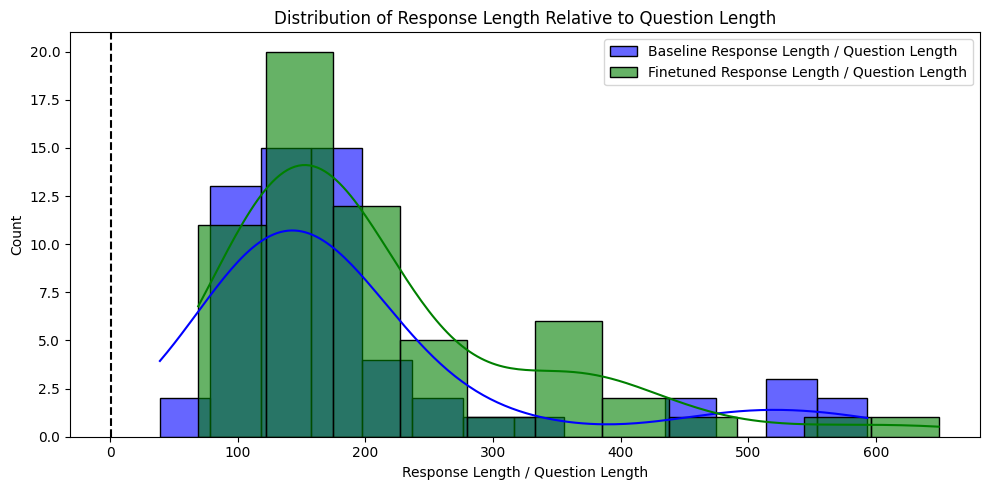

In [72]:
# Compute length ratios
df['baseline_len_to_question'] = df['baseline_response_len'] / df['question_len']
df['finetuned_len_to_question'] = df['finetuned_response_len'] / df['question_len']

plt.figure(figsize=(10, 5))
sns.histplot(df['baseline_len_to_question'], kde=True, color='blue', label='Baseline Response Length / Question Length', alpha=0.6)
sns.histplot(df['finetuned_len_to_question'], kde=True, color='green', label='Finetuned Response Length / Question Length', alpha=0.6)
plt.axvline(1, color='black', linestyle='--')
plt.legend()
plt.title("Distribution of Response Length Relative to Question Length")
plt.xlabel("Response Length / Question Length")
plt.tight_layout()
plt.show()


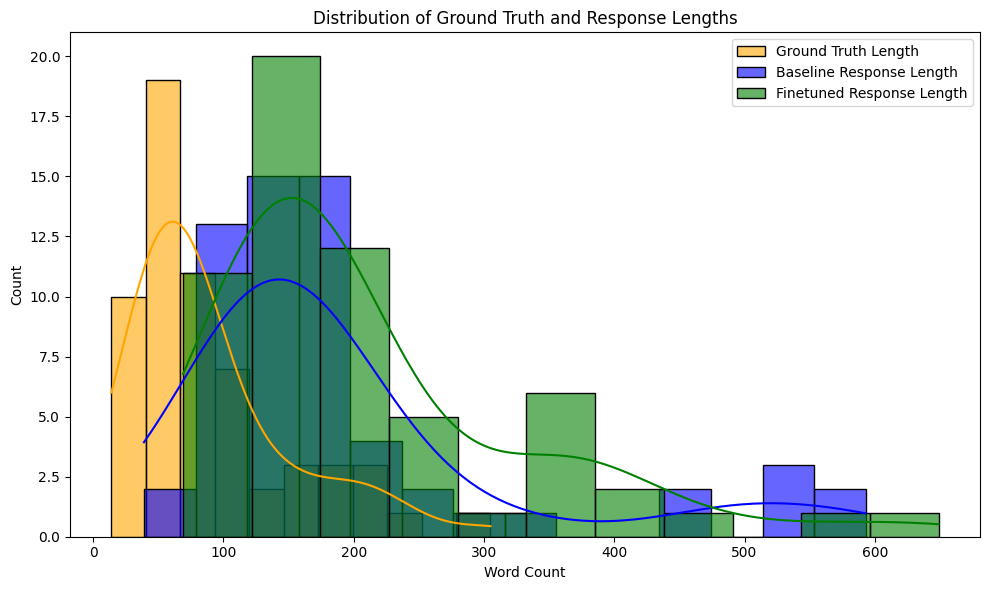

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ground_truth_len'], kde=True, color='orange', label='Ground Truth Length', alpha=0.6)
sns.histplot(df['baseline_response_len'], kde=True, color='blue', label='Baseline Response Length', alpha=0.6)
sns.histplot(df['finetuned_response_len'], kde=True, color='green', label='Finetuned Response Length', alpha=0.6)
plt.legend()
plt.title("Distribution of Ground Truth and Response Lengths")
plt.xlabel("Word Count")
plt.tight_layout()
plt.show()


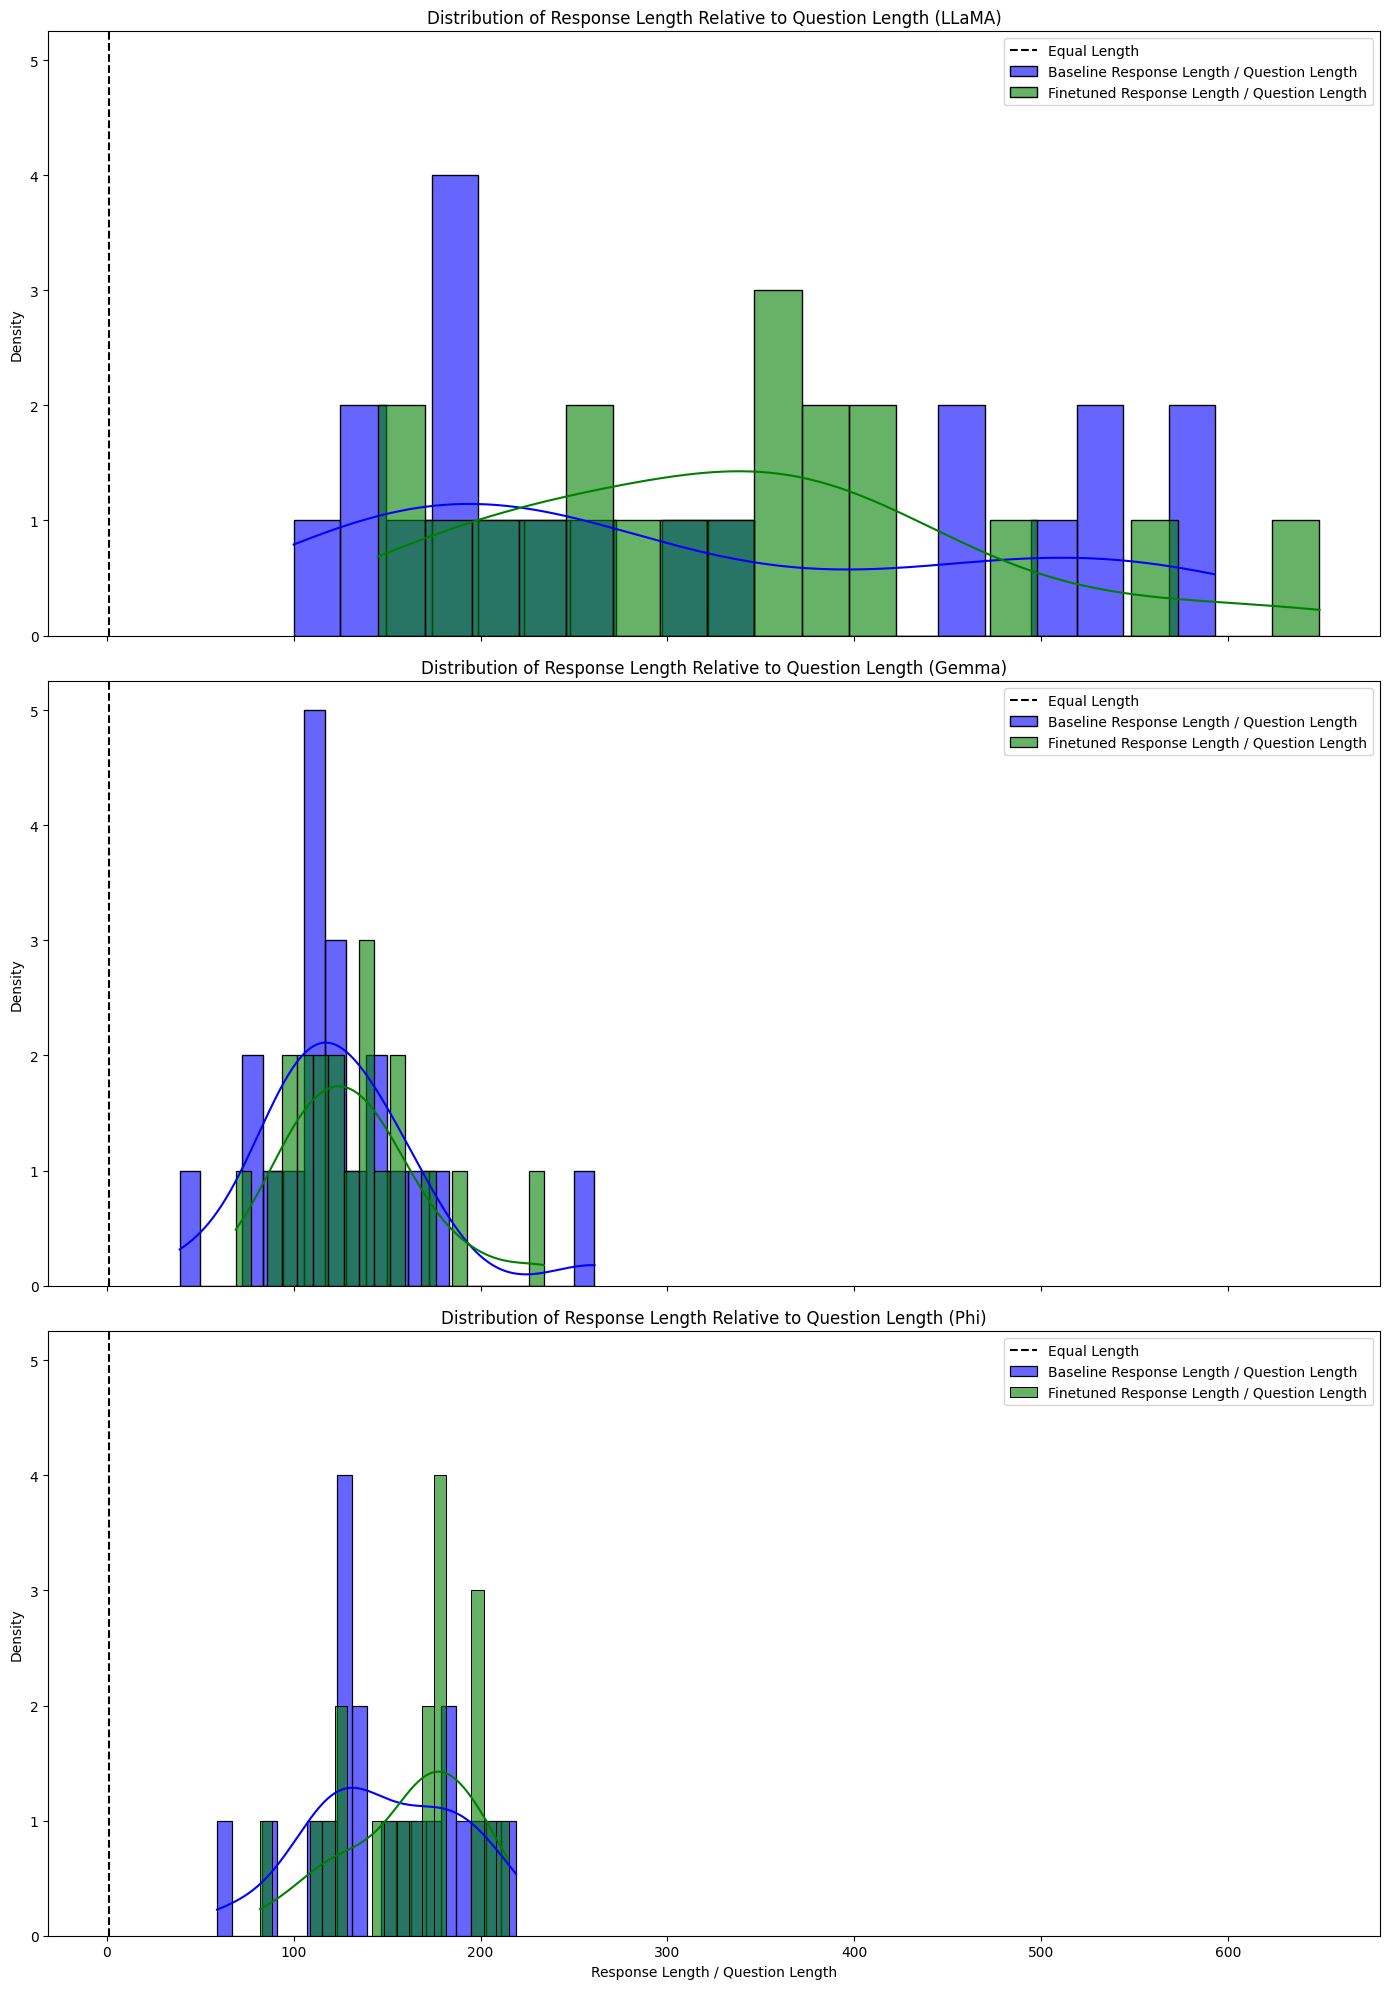

In [74]:
# Compute length ratios for all models
df['baseline_len_to_question'] = df['baseline_response_len'] / df['question_len']
df['finetuned_len_to_question'] = df['finetuned_response_len'] / df['question_len']

# Create subplots
models = df['model'].unique()
fig, axes = plt.subplots(len(models), 1, figsize=(14, 20), sharex=True, sharey=True)

# Loop through each model and create a separate plot
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = df[df['model'] == model]
    
    # Plot histogram for baseline and finetuned response lengths relative to question length
    sns.histplot(model_data['baseline_len_to_question'], kde=True, color='blue', label='Baseline Response Length / Question Length', ax=axes[i], alpha=0.6, bins=20)
    sns.histplot(model_data['finetuned_len_to_question'], kde=True, color='green', label='Finetuned Response Length / Question Length', ax=axes[i], alpha=0.6, bins=20)
    
    # Add vertical line at 1 (indicating equal response length to question length)
    axes[i].axvline(1, color='black', linestyle='--', label='Equal Length')
    
    # Title and labels
    axes[i].set_title(f"Distribution of Response Length Relative to Question Length ({model})")
    axes[i].set_xlabel("Response Length / Question Length")
    axes[i].set_ylabel("Density")
    
    # Add legend
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


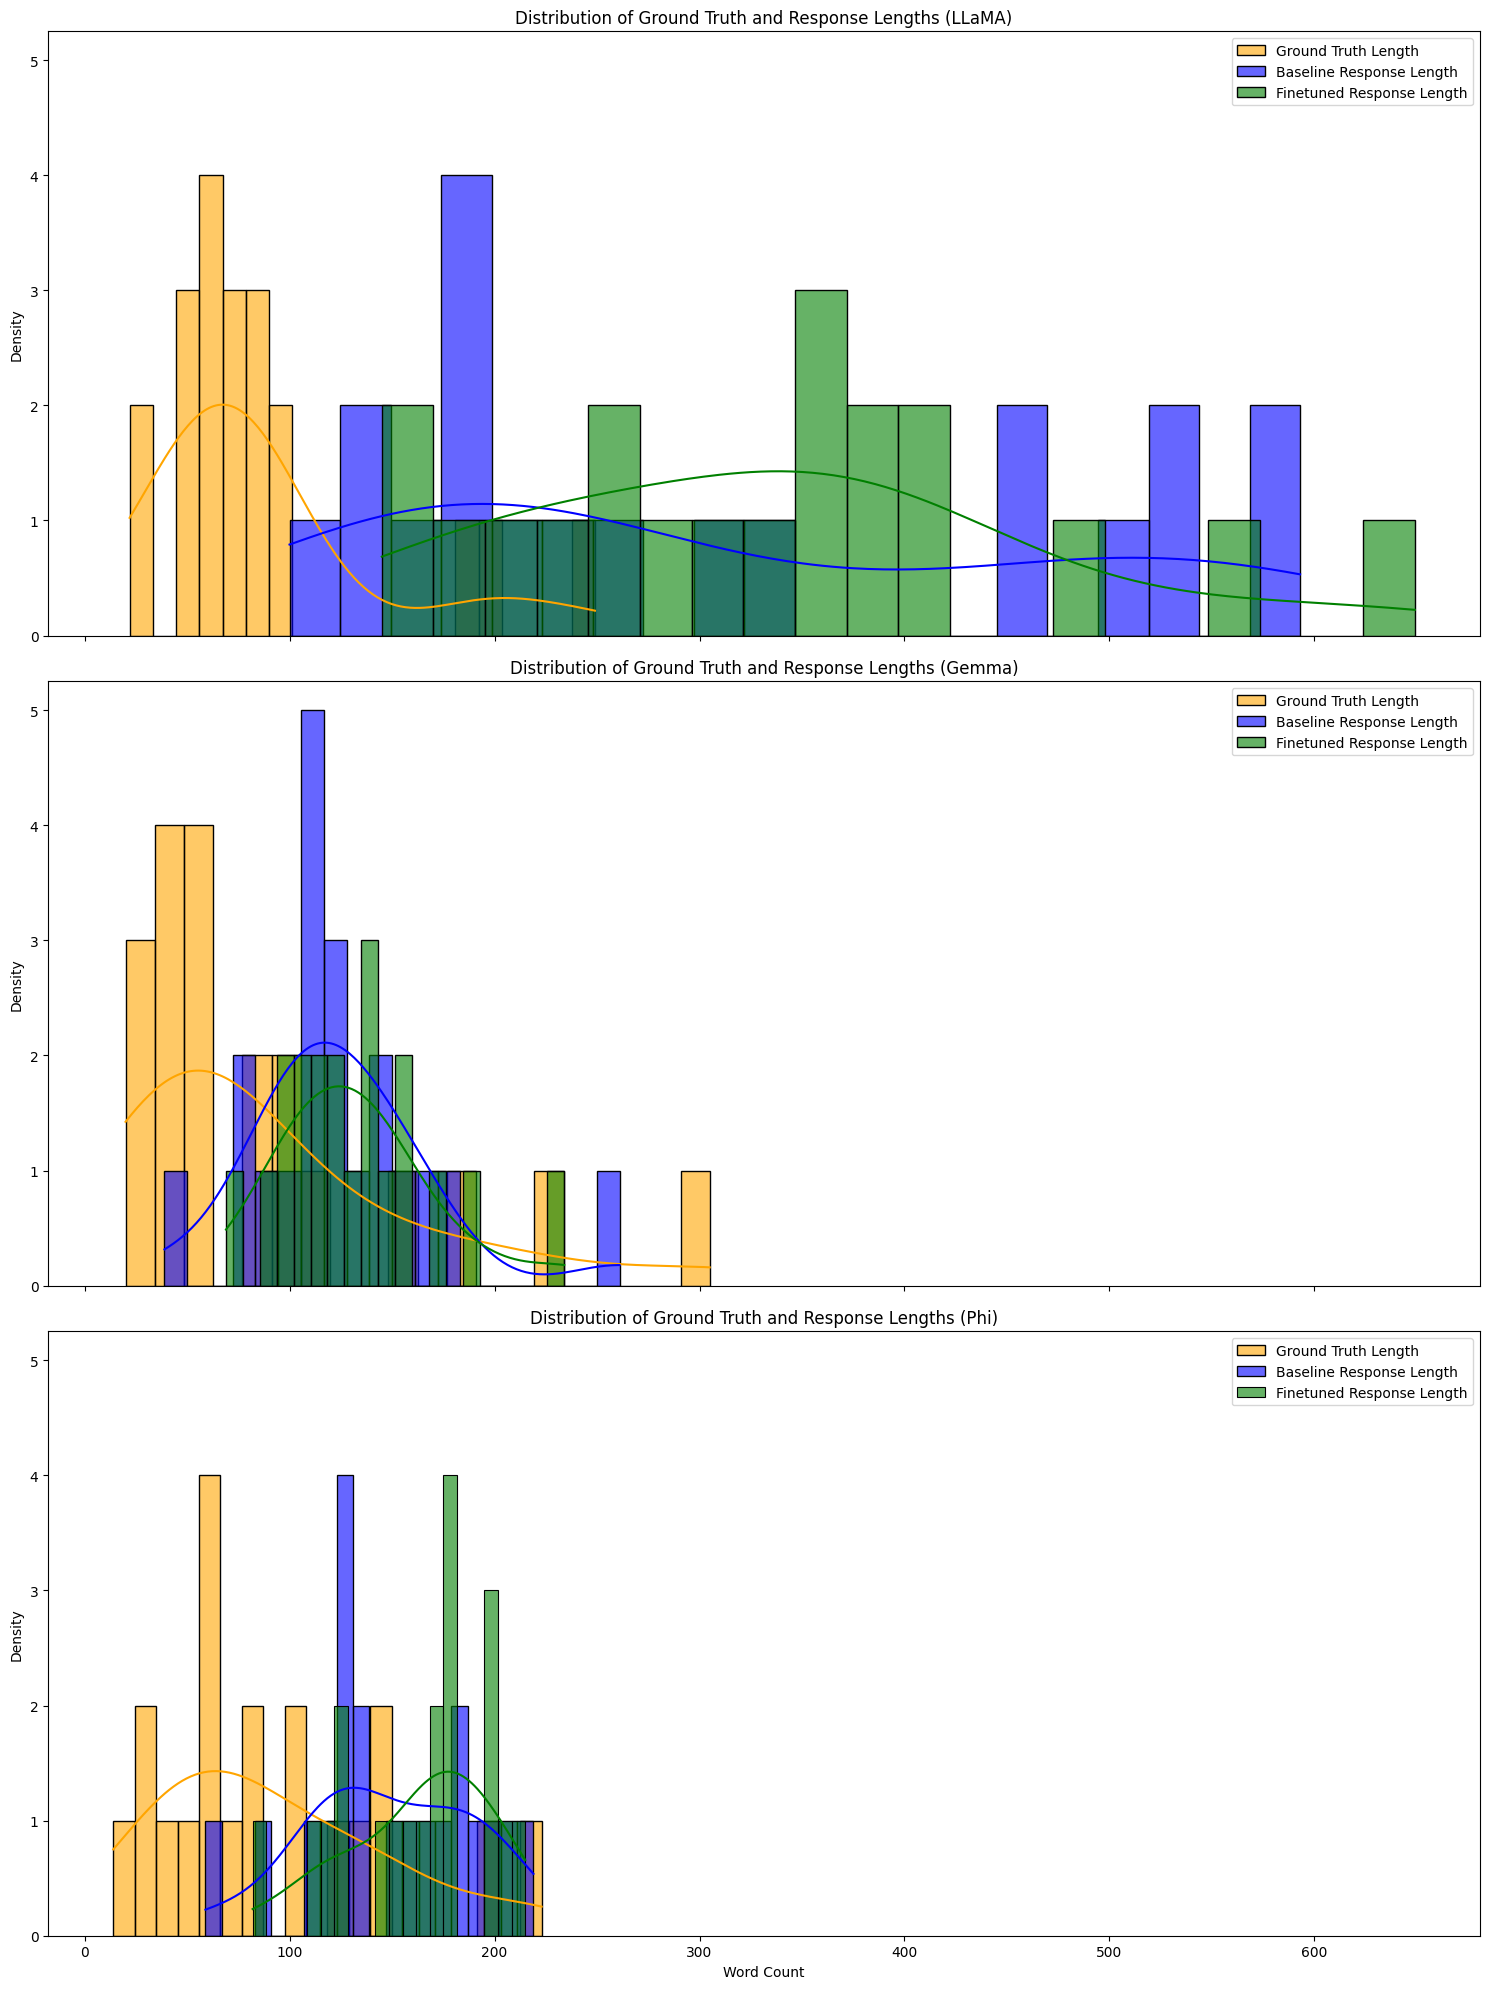

In [75]:
# Create subplots
models = df['model'].unique()
fig, axes = plt.subplots(len(models), 1, figsize=(15, 20), sharex=True, sharey=True)

# Loop through each model and create a separate plot
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = df[df['model'] == model]
    
    # Plot histograms for Ground Truth and Response Lengths (Baseline and Finetuned)
    sns.histplot(model_data['ground_truth_len'], kde=True, color='orange', label='Ground Truth Length', ax=axes[i], alpha=0.6, bins=20)
    sns.histplot(model_data['baseline_response_len'], kde=True, color='blue', label='Baseline Response Length', ax=axes[i], alpha=0.6, bins=20)
    sns.histplot(model_data['finetuned_response_len'], kde=True, color='green', label='Finetuned Response Length', ax=axes[i], alpha=0.6, bins=20)
    
    # Add title and labels
    axes[i].set_title(f"Distribution of Ground Truth and Response Lengths ({model})")
    axes[i].set_xlabel("Word Count")
    axes[i].set_ylabel("Density")
    
    # Add legend
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [76]:
df

,question,ground_truth,baseline_response,finetuned_response,baseline_bleu,baseline_rouge1,baseline_rouge2,baseline_rougeL,baseline_correctness,baseline_logical_coherence,...,finetuned_error_identification,finetuned_geval_reasoning_score,finetuned_geval_reasoning_reason,model,question_len,ground_truth_len,baseline_response_len,finetuned_response_len,baseline_len_to_question,finetuned_len_to_question
0,Q1,"Since the coefficients of $P(x)$ are real, if ...","Question: There are nonzero integers $a$, $b$,...","Question: There are nonzero integers $a$, $b$,...",0.072138,0.337449,0.126547,0.167353,1.0,0.30,...,0.5,0.097221,The Actual Output does not match the Expected ...,LLaMA,1,201,468,649,468.0,649.0
1,Q2,We begin with a system of two equations \begin...,"Question: Solve for $e$, given that $2d$ is $8...","Question: Solve for $e$, given that $2d$ is $8...",0.053303,0.435484,0.219512,0.346774,1.0,1.00,...,1.0,0.612788,"The steps followed the evaluation criteria, bu...",LLaMA,1,60,196,206,196.0,206.0
2,Q3,"First, we use the distributive property to exp...",Question: Solve the inequality $$-13(r+5) + 25...,Question: Solve the inequality $$-13(r+5) + 25...,0.096143,0.385714,0.172662,0.278571,1.0,1.00,...,0.5,0.660938,"Input, Actual Output, and Expected Output are ...",LLaMA,1,74,210,191,210.0,191.0
3,Q4,The magnitude is $$\n|5-12i| = \sqrt{5^2 + (-1...,Question: Find the magnitude of the complex nu...,Question: Find the magnitude of the complex nu...,0.137761,0.317460,0.145161,0.269841,1.0,1.00,...,1.0,0.499777,The actual output provides step-by-step soluti...,LLaMA,1,22,100,147,100.0,147.0
4,Q5,"Rearranging the first equation, we have that $...",Question: $a$ and $b$ are real numbers and sat...,Question: $a$ and $b$ are real numbers and sat...,0.110006,0.380000,0.080537,0.213333,0.0,0.00,...,0.9,0.164977,The solution does not follow the steps correct...,LLaMA,1,56,149,376,149.0,376.0
5,Q6,Properties of exponents allow us to simplify e...,Question: Compute $36^{10} \div 6^{19}$.\nPlea...,Question: Compute $36^{10} \div 6^{19}$.\nPlea...,0.246057,0.453782,0.305085,0.386555,1.0,1.00,...,0.2,0.158736,The steps taken provide detailed explanations ...,LLaMA,1,69,140,476,140.0,476.0
6,Q7,"By the Integer Root Theorem, the possible inte...",Question: Find all the integer roots of\n\[2x^...,Question: Find all the integer roots of\n\[2x^...,0.019389,0.166976,0.067039,0.129870,1.0,1.00,...,1.0,0.170082,The actual output does not follow the provided...,LLaMA,1,47,531,420,531.0,420.0
7,Q8,First we begin by solving the system of equati...,Question: If $2a+4b=5$ and $a$ is equal to thr...,Question: If $2a+4b=5$ and $a$ is equal to thr...,0.147228,0.482014,0.210145,0.366906,1.0,1.00,...,1.0,0.560737,The actual output follows the evaluation steps...,LLaMA,1,61,188,234,188.0,234.0
8,Q9,"By the Pythagorean theorem, we have \begin{ali...",Question: The length of one leg of a right tri...,Question: The length of one leg of a right tri...,0.024111,0.169643,0.080597,0.116071,0.2,0.20,...,1.0,0.150511,The explanation follows the steps provided - 1...,LLaMA,1,74,591,418,591.0,418.0
9,Q10,If the given quadratic equation has one soluti...,Question: Let $a$ be a real number for which t...,Question: Let $a$ be a real number for which t...,0.051277,0.227618,0.091324,0.148710,0.9,0.50,...,0.9,0.371931,Actual output did not simplify $2b^2 - 4(a-b) ...,LLaMA,1,97,593,339,593.0,339.0


In [85]:
import pandas as pd
from tabulate import tabulate

# Sample data (replace with your actual data loading method, e.g., pd.read_csv('your_file.csv'))
data = df.copy()
# Convert to DataFrame
df2 = pd.DataFrame(data)

# Group by model and compute averages
models = df2['model'].unique()

# Metrics to summarize (display names)
metrics = [
    'BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 
    'Correctness', 'Logical Coherence', 
    'Error Identification', 'GEval Reasoning', 
    'Avg Response Length'
]

# Mapping of display names to actual column keys (without excessive transformation)
metric_keys = {
    'BLEU': 'bleu',
    'ROUGE-1': 'rouge1',
    'ROUGE-2': 'rouge2',
    'ROUGE-L': 'rougeL',
    'Correctness': 'correctness',
    'Logical Coherence': 'logical_coherence',
    'Error Identification': 'error_identification',
    'GEval Reasoning': 'geval_reasoning_score',
    'Avg Response Length': 'response_len'
}

# Prepare pivoted summary data (metrics as rows, models as columns)
summary_data = []
for metric in metrics:
    row = [metric]
    key = metric_keys[metric]
    for model in models:
        model_df = df2[df2['model'] == model]
       # if metric in ['Error Identification', 'GEval Reasoning']:
       #     # Only finetuned has these metrics
       #     row.append('-')  # Baseline
       #     row.append(round(model_df[f'finetuned_{key}'].mean(),2))  # Finetuned
       # else:
        row.append(round(model_df[f'baseline_{key}'].mean(),2))  # Baseline
        row.append(round(model_df[f'finetuned_{key}'].mean(),2))  # Finetuned
    summary_data.append(row)

# Define pivoted column headers
headers = ['Metric']
for model in models:
    headers.extend([f'{model} (B)', f'{model} (F)'])

# Format the table
table = tabulate(
    summary_data,
    headers=headers,
    tablefmt='grid',
    floatfmt='.3f'
)

# Print the table
print("Pivoted Summary of Model Evaluation Metrics (Averaged over 20 Questions):")
print(table)

# Optional: Save to a file
with open('pivoted_model_evaluation_summary_metrics_rows.txt', 'w') as f:
    f.write("Pivoted Summary of Model Evaluation Metrics (Averaged over 20 Questions):\n")
    f.write(table)

Pivoted Summary of Model Evaluation Metrics (Averaged over 20 Questions):
+----------------------+-------------+-------------+-------------+-------------+-----------+-----------+
| Metric               |   LLaMA (B) |   LLaMA (F) |   Gemma (B) |   Gemma (F) |   Phi (B) |   Phi (F) |
+======================+=============+=============+=============+=============+===========+===========+
| BLEU                 |       0.090 |       0.080 |       0.110 |       0.110 |     0.110 |     0.110 |
+----------------------+-------------+-------------+-------------+-------------+-----------+-----------+
| ROUGE-1              |       0.330 |       0.310 |       0.400 |       0.380 |     0.360 |     0.360 |
+----------------------+-------------+-------------+-------------+-------------+-----------+-----------+
| ROUGE-2              |       0.140 |       0.130 |       0.160 |       0.140 |     0.150 |     0.140 |
+----------------------+-------------+-------------+-------------+-------------+------